In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset
      
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from tqdm.notebook import tqdm,trange
# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [15]:

# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_1x125_aerosol_compare_Eulerian'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20110101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.20110101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]
LA0              = NcFile0.variables['SpeciesConc_PASV_LA'][:,:,:,:]
LA0_3            = NcFile0.variables['SpeciesConc_PASV_LA3'][:,:,:,:]

LA0 = LA0 + LA0_3

GC_AREA0 = NcFile0.variables['AREA'][:,:];

EU3

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU2(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU2
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (30, 72, 181, 288)
filling off

In [16]:
del NcFile0, NcFile3

In [17]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------
            

# 2x2.5         
AD_file3 = open(FILEDIR3+'/State_Met_AD.txt','r')

GC_AD3 = EU3[0,:,:,:]*0.0

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

for ix in range(Nx3):
    for iy in range(Ny3):
        for iz in range(Nz3):
            line = AD_file3.readline()
            GC_AD3[iz,iy,ix] = float(line)
            

# Lagrange: 2x2.5          
AD_file0 = open(FILEDIR0+'/State_Met_AD.txt','r')

GC_AD0 = LA0[0,:,:,:]*0.0

Nx0 = len(LA0[0,0,0,:])
Ny0 = len(LA0[0,0,:,0])
Nz0 = len(LA0[0,:,0,0])
Nt0 = len(LA0[:,0,0,0])

for ix in range(Nx0):
    for iy in range(Ny0):
        for iz in range(Nz0):
            line = AD_file0.readline()
            GC_AD0[iz,iy,ix] = float(line)

In [18]:
del AD_file0, AD_file3


In [19]:
### change unit, do average 


# 2.0x2.5
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt3):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt3):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]
     
print( np.sum(EU3_molec[Nt3-1,:,:,:]) )

# lagrange: 2.0x2.5
LA0_molec = LA0[:,:,:,:]*0.0
for i in range(Nt0):
    LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
for i in range(Nt0):
    LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4
    
print( np.sum(LA0_molec[Nt0-1,:,:,:]) )



56638350000000.0
6.5162953e+28


In [20]:
# delete original variable to save memory
del EU3, LA0

In [21]:
LA0_Total_molec, EU3_Total_molec = [],[]

inject_molec = []

for i in range(Nt0):
    LA0_Total_molec.append( np.sum(LA0_molec[i,:,:,:]) )
        
for i in range(Nt3):
    EU3_Total_molec.append( np.sum(EU3_molec[i,:,:,:]) )
    

for i in range(Nt3):
    inject_molec.append( LA0_Total_molec[0]*(i+1) )

In [22]:
# Plot Gini coefficient at different time:

plt.figure(figsize=(8,6), dpi= 100)

plt.plot(LA0_Total_molec,'r',label=f'Total tracer exist in GPD model')
plt.plot(EU3_Total_molec,'b--',label=f'Total tracer exist in GEOS-Chem')

plt.plot(inject_molec,'k--',label=f'Total injected tracer ')


#plt.legend(loc='upper left')
# plt.title(' Total mass at different time')
plt.xlabel(' Day ')
plt.ylabel(' mass [molec] ')
plt.legend()

plt.savefig('Total_mass_time_series.png')
plt.clf();
plt.cla();
plt.close();


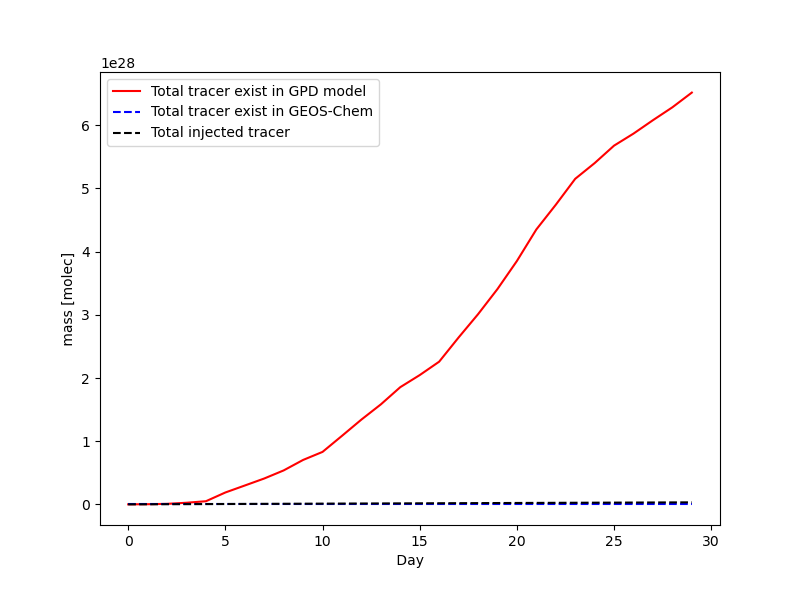

In [23]:
Image('Total_mass_time_series.png') 

In [13]:
# LA0_Total_molec

In [14]:
# EU3_Total_molec